# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results.

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# T2D Susceptibility Determination Through Gut Bacteria
Project mentor: Aayush Mishra

Yagmur Ozturk <yozturk1@jh.edu>, Chenhao Lyu <clyu6@jh.edu>, Yiran Zhong <yzhong43@jh.edu>, You Zuo <yzuo12@jh.edu>

Link_to_git_repo

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Would like to complete #1": Investigate the potential for integrating additional data sources (e.g., environmental factors) to improve predictive accuracy. Not completed because the team ran out of time and relevant data wasn't easily available.
2. "Would like to complete #2": Explore interpretability techniques to explain model predictions and identify actionable insights for healthcare professionals. The team ran out of time so we couldn't complete it.


### Completed Deliverables
1. "Must complete #1": Select relevant dataset(s) containing SNP data related to T2D susceptibility. [in "Dataset" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. "Must complete #2": Implement and evaluate machine learning models for T2D susceptibility prediction. In Models and Evaluation below.
3. "Must complete #3": Analyze and interpret feature importance to understand the genetic basis of T2D. In Methods below.
4. "Must complete #4": Present findings in a clear and concise manner through visualizations and summary tables. In results section below.
5. "Expect to complete #1": Optimize hyperparameters for the best-performing model(s). In methods section below.
6. "Expect to complete #2": Compare the performance of different classification algorithms and feature selection methods. In models and methods below as well as results.
7. "Would like to complete #3": Share the developed model as a resource for further research in personalized medicine and disease prevention. Above through the github repo.


### Additional Deliverables
N/A

# Preliminaries

## What problem were you trying to solve or understand?

What are the real-world implications of this data and task?

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

What makes this problem unique?

What ethical implications does this problem have?


In our machine learning project, we initially aimed to predict an individual's susceptibility to Type 2 Diabetes (T2D) using Single Nucleotide Polymorphisms (SNPs). However, after our initial evaluations, we have pivoted to explore the relationship between gut microbiota and susceptibility to T2D. We are now utilizing the "abundance stoolsubset.txt" dataset, which features species-level relative abundances in gut bacteria.

The real-world implications of our revised project are significant. By understanding the links between gut microbiota and disease susceptibility, we can potentially identify new pathways for disease prevention and treatment. Early detection of disease susceptibility through gut microbiota profiles could lead to personalized dietary recommendations and interventions, enhancing health outcomes and reducing healthcare costs.

Our project continues to align with the classification tasks explored in our coursework. We are applying machine learning techniques such as random forests and support vector machines (SVM) to our dataset. These methods are well-suited to handle the complexity and high dimensionality of microbiota data.

This pivot makes our project unique because it involves an emerging area of research that links gut microbiota to a wide range of diseases, starting from T2D which can be expanded to many other diseases. It involves handling complex biological data and requires a nuanced understanding of microbiota's role in health and disease, emphasizing the importance of innovative data preprocessing and model interpretability.

Ethical considerations remain very important, especially when using sensitive health/biological data concerning data privacy and the management of these data. Ensuring unbiased models to avoid misrepresentation of different demographic groups and managing the psychological impact on individuals identified as at risk based on their microbiota profiles are also crucial.





## Dataset(s)

Describe the dataset(s) you used.

How were they collected?

Why did you choose them?

How many examples in each?


The dataset we have chosen to work with is composed of species-level relative abundances of gut bacteria from various individuals. Specifically, the data is structured such that each row represents a different type of bacterium identified by its taxonomic classification, and each column corresponds to a sample taken from an individual, labeled with an ID and indicating whether the sample was taken from a healthy individual or one with a disease.

This data was collected from stool samples of individuals, a common practice for studying gut microbiota due to the non-invasive nature of the collection process and the high concentration of bacteria in stool. This dataset was generated through meta-genomic analysis and DNA sequencing of the samples.

We chose this dataset because it offers a direct link between the gut microbiome composition and various diseases. The gut microbiome is increasingly recognized for its role in human health and disease, and analyzing its composition provides insights into the potential development of conditions like T2D.

The dataset has a total of 2,339 rows, which contains the information of individual samples such as bacterial species, and 1,990 columns, which correspond to individual samples.

In [ ]:
# Load your data and print 2-3 examples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint,uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('abundance_stoolsubset.txt', sep='\t', header=None, dtype=str)
data

,0,1,2,3,4,5,6,7,8,9,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,dataset_name,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,Candela_Africa,...,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer,Zeller_fecal_colorectal_cancer
1,sampleID,H10,H11,H12,H13,H14,H15,H16,H17,H18,...,CCIS91228662ST-4-0,CCIS93040568ST-20-0,CCIS94417875ST-3-0,CCIS94496512ST-4-0,CCIS95097901ST-4-0,CCIS95409808ST-4-0,CCIS96387239ST-4-0,CCIS98482370ST-3-0,CCIS98512455ST-4-0,CCIS98832363ST-4-0
2,subjectID,h10,h11,h12,h13,h14,h15,h16,h17,h18,...,fr-275,fr-682,fr-110,fr-229,fr-696,fr-152,fr-626,fr-052,fr-459,fr-552
3,bodysite,stool,stool,stool,stool,stool,stool,stool,stool,stool,...,stool,stool,stool,stool,stool,stool,stool,stool,stool,stool
4,disease,n,n,n,n,n,n,n,n,n,...,cancer,n,n,small_adenoma,n,n,small_adenoma,n,cancer,cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2335,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2336,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2337,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pre-processing

What features did you use or choose not to use? Why?

If you have categorical labels, were your datasets class-balanced?

How did you deal with missing data? What about outliers?

What approach(es) did you use to pre-process your data? Why?

Are your features continuous or categorical? How do you treat these features differently?


First, We transposed the dataset to have samples as rows and information of samples as columns. Since we focused on the gut microbiota dataset, aiming to understand its relationship with diseases, particularly Type 2 Diabetes (T2D) and another disease closely linked with it. So, we only used the data related to T2D. Then, we selected all of the features starting with 'k_', which is the data of bacterial species. They are all continuous features. We converted them to float64 for proper numerical analysis.
We mapped the categorical labels to binary classes. The diseases of T2D and impaired glucose tolerance are mapped as 1, the controls(health) are mapped as 0. Finally, We had 272 instances of disease and 217 controls. Two classes are approximately balanced.
Our final dataset included the filtered controls and disease instances, focusing on the datasets 'WT2D', 't2dmeta_long', and 't2dmeta_short'.

In [ ]:
# For those same examples above, what do they look like after being pre-processed?

In [ ]:
data = data.T
data.columns = data.iloc[0]
data = data.drop(data.index[0])
disease = data['disease']

In [ ]:
cols = data.columns.tolist()
species = [x for x in cols if x.startswith('k_')]
metadata = [x for x in cols if not x.startswith('k_')]

# Convert species data to float and concatenate with metadata
data_conv = data.copy()
data_conv[species] = data_conv[species].astype('float64')
data_conv = pd.concat([data[metadata], data_conv[species]], axis=1)

# Map certain 'disease' values to 'control'
data_conv['disease'] = data_conv['disease'].apply(
    lambda x: 'control' if x in ['n', 'nd'] else x
)

# Separate controls and diseases into two dataframes
pd_control = data_conv[data_conv['disease'] == 'control']
pd_disease = data_conv[data_conv['disease'] != 'control']

# Filter out non-interest diseases
not_disease = [d for d in pd_disease['disease'].unique() if d != 't2d' and d != 'impaired_glucose_tolerance']
for d in not_disease:
    pd_disease = pd_disease[pd_disease['disease'] != d]

In [ ]:
ds_names = ['WT2D', 't2dmeta_long', 't2dmeta_short']
pd_cont = pd_control.loc[pd_control['dataset_name'] == ds_names[0]]
pd_dis = pd_disease.loc[(pd_disease['disease'].isin(['t2d','impaired_glucose_tolerance'])) & (pd_disease['dataset_name'] == ds_names[0])]
for ds in ds_names[1:]:
    pd_cont = pd.concat([pd_cont, pd_control.loc[pd_control['dataset_name'] == ds]], axis=0)
    pd_dis = pd.concat([pd_dis, pd_disease.loc[(pd_disease['disease'].isin(['t2d','impaired_glucose_tolerance'])) & (pd_disease['dataset_name'] == ds)]], axis=0)
pd_train = pd.concat([pd_cont, pd_dis])
y = pd_train['disease'].isin(['t2d','impaired_glucose_tolerance']).astype(int)
x = pd_train[species]

In [ ]:
pd_train

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
1712,WT2D,S118,s118,stool,control,70.02,nd,sweden,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,WT2D,S121,s121,stool,control,69.27,nd,sweden,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1714,WT2D,S126,s126,stool,control,69.48,nd,germany,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1715,WT2D,S127,s127,stool,control,70.01,nd,sweden,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1717,WT2D,S137,s137,stool,control,70.05,nd,sweden,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,t2dmeta_short,DOM020,dom020,stool,t2d,43,male,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1669,t2dmeta_short,DOM021,dom021,stool,t2d,72,male,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,t2dmeta_short,DOM023,dom023,stool,t2d,39,male,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,t2dmeta_short,DOM024,dom024,stool,t2d,42,male,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

In [ ]:
# Before pre-processing
disease.value_counts()

disease
n                             944
t2d                           223
obesity                       164
ibd_ulcerative_colitis        148
cirrhosis                     118
leaness                        89
stec2-positive                 52
impaired_glucose_tolerance     49
cancer                         48
n_relative                     47
small_adenoma                  26
ibd_crohn_disease              25
 -                             20
large_adenoma                  13
overweight                     10
-                               7
obese                           5
underweight                     1
Name: count, dtype: int64

In [ ]:
# After pre-processing
pd_train['disease'].value_counts()

disease
t2d                           223
control                       217
impaired_glucose_tolerance     49
Name: count, dtype: int64

In [ ]:
# Before pre-processing
data['dataset_name'].value_counts()

dataset_name
Neilsen_genome_assembly              382
t2dmeta_long                         290
Chatelier_gut_obesity                278
Quin_gut_liver_cirrhosis             232
hmp                                  152
WT2D                                 145
Zeller_fecal_colorectal_cancer       134
metahit                              110
t2dmeta_short                         73
Tito_subsistence_gut                  58
hmpii                                 44
Loman2013_EcoliOutbreak_DNA_HiSeq     44
Candela_Africa                        38
Loman2013_EcoliOutbreak_DNA_MiSeq      9
Name: count, dtype: int64

In [ ]:
# After pre-processing
pd_train['dataset_name'].value_counts()

dataset_name
t2dmeta_long     271
WT2D             145
t2dmeta_short     73
Name: count, dtype: int64

# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

How did you split your data into train and test sets? Why?

1: Our evaluation of methods primarily focuses on accuracy scores, obtained through cross-validation and on a separate test set. Accuracy is the count of predictions where the predicted value equals the true value divided by the total number of observations. It's a reasonable metric when the class distribution is balanced. While For imbalanced datasets, other metrics like F1 score, precision, recall, and AUC-ROC are usually recommended. Our target is approximately balanced, we have 272 as 'true' and 217 as 'false' in our 489 samples.

2: For the models used (Decision Trees, Random Forest, SVM, Logistic Regression, and Gradient Boosting), the default loss functions were employed:

-- Decision Trees and Random Forests: Typically use "gini" for Gini impurity or "entropy" for information gain as criteria to split nodes

-- SVM: The hinge loss is standard

-- Logistic Regression: Usually employs binary cross-entropy (log loss) for binary classification

-- Gradient Boosting: Uses deviance (a form of logistic regression) for classification by default.

3: The data is split into training and testing sets using the train_test_split method with an 80-20% ratio. This is a standard practice that allows for the evaluation of model performance on unseen data.

A binary target variable y is created, marking samples as related to the disease of interest ('t2d' or 'impaired_glucose tolerance') or not.
The feature matrix x is extracted, containing only species abundance data.

In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression with L2 regularization uses log loss by default
logistic_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Logistic Regression with L1 regularization also uses log loss by default
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Gradient Boosting for classification uses deviance loss by default (which is a logistic regression for binary outcomes)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42)

# SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Decision Tree with Gini impurity as the criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Decision Tree with Entropy as the criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Random Forest with Gini impurity as the criterion
rf_gini = RandomForestClassifier(criterion='gini', random_state=42)

## Baselines

What baselines did you compare against? Why are these reasonable?

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

1: Logistic Regression is a good starting point for binary classification problems due to its simplicity and efficiency. It provides a baseline for performance and interpretability.

## Methods

What methods did you choose? Why did you choose them?

How did you train these methods, and how did you evaluate them? Why?

Which methods were easy/difficult to implement and train? Why?

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

1: Since the amount of data is small, we don't consider any neural networks, but only traditional machine learning models instead. We implemented the following models:

Logistic Regression: Often used as a baseline for binary classification due to its simplicity and interpretability. Its performance on our task gives a baseline measure of linear separability in the data.

Support Vector Machine (SVM): With different kernels, SVMs can capture linear and non-linear boundaries, making them a strong contender, especially for datasets where the decision boundary is not linearly separable.

Decision Trees: Provide a non-linear approach with high interpretability. A single decision tree can serve as a baseline for more complex ensemble methods.

Random Forest: An ensemble of decision trees that usually outperforms a single decision tree due to its higher complexity and better generalization capabilities.

Gradient Boosting: A state-of-the-art ensemble technique that often provides significant performance improvements over simpler models due to its ability to combine weak learners into a strong one.

These models have varying levels of complexity and interpretability provide a comprehensive overview of potential solutions for the prediction.

2: Our models were trained using a cross-validation approach, which helps ensure that the results are generalizable and not tailored to a specific subset of our data. The evaluation is based on accuracy, which is a straightforward metric for binary classification problems, though in a medical context, other metrics like precision, recall, and the F1 score might also be relevant, especially considering the cost of false negatives or false positives.


3: For logistic regression and svm, we manually tried some hyperparameters. For decision tree, random forest and gradient boosting model, since there are much more hyperparameters, we decided to use halving random search to tune each model's hyperparameters, which can efficiently narrow down the most promising hyperparameters by iteratively selecting the best-performing half of parameters for further tuning. But this method involves with randomness. So, we also manually set some hyperparameters for them and chose the best one.

-- For Logistic Regression, we tuned on penalty, trying L1 regularization and L2 regularization.

-- For SVM, we tuned on kernel, trying linear, polynomial and rbf.

-- For Decision Tree, we tuned on min_samples_split, min_samples_leaf, max_depth, criterion.

-- For Random Forest, we tuned on min_samples_split, max_depth, n_estimators, min_samples_leaf.

-- For Gradient Boosting Model, we tuned on min_samples_split, max_depth, n_estimators, min_samples_leaf, learning_rate.

Our model did not have much improvement based on the best hyperparamter we find for our models, we assume the limitation on the number of our data and the numerous number of features may influence the effect of the hyper parameter.


In [ ]:
# Code for hyperparameter tuning, or link to your Git repository
#DecisionTree random search
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', DecisionTreeClassifier())  # Classifier
])

# Define the hyperparameter space
space = {
    'classifier__min_samples_split': uniform(0.01, 0.2) ,
    'classifier__max_depth': randint(3, 11),
    'classifier__min_samples_leaf': uniform(0.01, 0.2) ,
    'classifier__criterion': ['gini', 'entropy']
}


# Initialize the HalvingRandomSearchCV object
hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space, n_candidates=50, factor=2, cv=10, scoring='accuracy', random_state=42)

# Fit the model
hrs.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters:", hrs.best_params_)
print("Best score:", hrs.best_score_)

In [ ]:
# random forest random search
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', RandomForestClassifier())  # Classifier
])

# Define the hyperparameter space
space = {
    'classifier__min_samples_split': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 11),
    'classifier__n_estimators': randint(10, 201),
    'classifier__min_samples_leaf': uniform(0.01, 0.2)
}


# Initialize the HalvingRandomSearchCV object
hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space, n_candidates=50, factor=2, cv=10, scoring='accuracy', random_state=42)

# Fit the model
hrs.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters:", hrs.best_params_)
print("Best score:", hrs.best_score_)


In [ ]:
# Gradientboosting random search
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', GradientBoostingClassifier())  # Classifier
])

# Define the hyperparameter space
space = {
    'classifier__min_samples_split': uniform(0.01, 0.2) ,
    'classifier__max_depth': randint(3, 11),
    'classifier__n_estimators': randint(10, 201),
    'classifier__min_samples_leaf': uniform(0.01, 0.2) ,
    'classifier__learning_rate': uniform(0.01, 0.2)
}


# Initialize the HalvingRandomSearchCV object
hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space, n_candidates=50, factor=2, cv=10, scoring='accuracy', random_state=42)

# Fit the model
hrs.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters:", hrs.best_params_)
print("Best score:", hrs.best_score_)

In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV

def perform_hyperparameter_search(pipeline, space, x_train, y_train):
    # Initialize the HalvingRandomSearchCV object
    hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space,
                                n_candidates=50, factor=2, cv=10,
                                scoring='accuracy', random_state=42)
    # Fit the model
    hrs.fit(x_train, y_train)
    # Get the best parameters and score
    print("Best parameters:", hrs.best_params_)
    print("Best score:", hrs.best_score_)
    return hrs.best_estimator_

def plot_metrics(train_scores, val_scores, title):
    epochs = range(1, len(train_scores) + 1)
    plt.plot(epochs, train_scores, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_scores, 'ro-', label='Validation accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def train_and_evaluate_model(pipeline, space, x_train, y_train, x_test, y_test):
    # Perform hyperparameter search
    best_pipeline = perform_hyperparameter_search(pipeline, space, x_train, y_train)

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    val_scores = []
    train_scores = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(x_train, y_train)):
        x_train_fold, x_val_fold = x_train.iloc[train_idx], x_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        best_pipeline.fit(x_train_fold, y_train_fold)

        # Compute training accuracy
        train_accuracy = best_pipeline.score(x_train_fold, y_train_fold)
        train_scores.append(train_accuracy)

        # Compute validation accuracy
        val_accuracy = best_pipeline.score(x_val_fold, y_val_fold)
        val_scores.append(val_accuracy)

    # Evaluate on the test set
    test_accuracy = best_pipeline.score(x_test, y_test)

    # Plot training and validation accuracy
    plot_metrics(train_scores, val_scores, f'Performance of {type(best_pipeline.named_steps["classifier"]).__name__}')

    return test_accuracy


# For the Gradient Boosting Classifier:
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_space = {
    'classifier__min_samples_split': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 11),
    'classifier__n_estimators': randint(10, 201),
    'classifier__min_samples_leaf': uniform(0.01, 0.2),
    'classifier__learning_rate': uniform(0.01, 0.2)
}

# random forest random search
# Define the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', RandomForestClassifier())  # Classifier
])

# Define the hyperparameter space
rf_space = {
    'classifier__min_samples_split': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 11),
    'classifier__n_estimators': randint(10, 101),
    'classifier__min_samples_leaf': uniform(0.01, 0.2)
}

#DecisionTree random search
# Define the pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', DecisionTreeClassifier())  # Classifier
])

# Define the hyperparameter space
dt_space = {
    'classifier__min_samples_split': uniform(0.01, 0.2) ,
    'classifier__max_depth': randint(3, 11),
    'classifier__min_samples_leaf': uniform(0.01, 0.2) ,
    'classifier__criterion': ['gini', 'entropy']
}

# Now train, evaluate and plot metrics for the Gradient Boosting Classifier
gb_test_accuracy = train_and_evaluate_model(gb_pipeline, gb_space, x_train, y_train, x_test, y_test)
print(f"Gradient Boosting Test Accuracy: {gb_test_accuracy}")

# Now train, evaluate and plot metrics for the RF Classifier
rf_test_accuracy = train_and_evaluate_model(rf_pipeline, rf_space, x_train, y_train, x_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

# Now train, evaluate and plot metrics for the DT Classifier
dt_test_accuracy = train_and_evaluate_model(dt_pipeline, dt_space, x_train, y_train, x_test, y_test)
print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def plot_metrics2(train_scores, val_scores, title):
    epochs = range(1, len(train_scores) + 1)
    plt.plot(epochs, train_scores, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_scores, 'ro-', label='Validation accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def train_and_evaluate_model2(pipeline, x_train, y_train, x_test, y_test):
    # Perform cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    val_scores = []
    train_scores = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(x_train, y_train)):
        x_train_fold, x_val_fold = x_train.iloc[train_idx], x_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(x_train_fold, y_train_fold)

        # Compute training accuracy
        train_accuracy = pipeline.score(x_train_fold, y_train_fold)
        train_scores.append(train_accuracy)

        # Compute validation accuracy
        val_accuracy = pipeline.score(x_val_fold, y_val_fold)
        val_scores.append(val_accuracy)

    # Evaluate on the test set
    test_accuracy = pipeline.score(x_test, y_test)

    model_name = type(pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]).__name__
    title = f"Performance of {model_name}"

    # Plot training and validation accuracy
    plot_metrics2(train_scores, val_scores, title)

    return test_accuracy


# Define the Logistic Regression pipelines with L1 and L2 regularization
lr_l1_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

lr_l2_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(penalty='l2', random_state=42))
])

# Define the SVM pipelines with different kernels
svm_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='linear', random_state=42))
])
#poly kernel
svm_poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='poly', random_state=42))
])
#rbf kernel
svm_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='rbf', random_state=42))
])

# Now train, evaluate and plot metrics for Logistic Regression and SVMs
pipelines = [lr_l1_pipeline, lr_l2_pipeline, svm_linear_pipeline, svm_poly_pipeline, svm_rbf_pipeline]
for pipeline in pipelines:
    model_name = type(pipeline.named_steps['logistic_regression'] if 'logistic_regression' in pipeline.named_steps else pipeline.named_steps['SVM']).__name__
    print(f"Training and evaluating model: {model_name}")
    train_and_evaluate_model2(pipeline, x_train, y_train, x_test, y_test)

The Gradient boosting model and random forest have overall better performance. We decide to apply further optimization on the feature selection since the hyperparameter tuning did not bring much improvement.

In [ ]:
import shap
def feature_importance_and_selection(model, model_name, x_train, y_train):
    # Create a SHAP explainer object
    explainer = shap.Explainer(model, x_train)
    shap_values = explainer(x_train)

    # Check if the SHAP values are in a list (multi-output) and handle accordingly
    if 'Random Forest' in model_name:
        # For Random Forest and multi-class classifiers, SHAP returns a list of arrays
        shap_sum = np.abs(shap_values.values).mean(axis=0)
        importance_df = pd.DataFrame({
            'Feature': x_train.columns.tolist(),
            'SHAP Importance': shap_sum.tolist()
        })
        importance_df = importance_df.sort_values('SHAP Importance', ascending=False)
        importance_df['Mean SHAP Importance'] = importance_df['SHAP Importance'].apply(lambda x: sum(x) / len(x))

        # Display the DataFrame
        print(f"SHAP Feature Importance for {model_name}:")
        display(importance_df)

        # Select features with SHAP Importance greater than 0
        selected_features = importance_df[importance_df['Mean SHAP Importance'] > 0]['Feature']
    else:
        # Calculate the mean absolute SHAP value for each feature for models like Gradient Boosting
        shap_sum = np.abs(shap_values.values).mean(axis=0)

        importance_df = pd.DataFrame({
            'Feature': x_train.columns.tolist(),
            'SHAP Importance': shap_sum.tolist()
        })
        importance_df = importance_df.sort_values('SHAP Importance', ascending=False)


        # Display the DataFrame
        print(f"SHAP Feature Importance for {model_name}:")
        display(importance_df)

        # Select features with SHAP Importance greater than 0
        selected_features = importance_df[importance_df['SHAP Importance'] > 0]['Feature']

    return selected_features


def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, re_tune=False, space=None):
    if re_tune:
        # Initialize the HalvingRandomSearchCV object
        hrs = HalvingRandomSearchCV(estimator=model, param_distributions=space, n_candidates=50,
                                    factor=2, cv=10, scoring='accuracy', random_state=42)
        # Fit the model
        hrs.fit(x_train, y_train)
        print("Best parameters:", hrs.best_params_)
        print("Best score:", hrs.best_score_)
        model = hrs.best_estimator_

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    val_scores = []
    train_scores = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(x_train, y_train)):
        x_train_fold, x_val_fold = x_train.iloc[train_idx], x_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(x_train_fold, y_train_fold)

        # Compute training accuracy
        train_accuracy = model.score(x_train_fold, y_train_fold)
        train_scores.append(train_accuracy)

        # Compute validation accuracy
        val_accuracy = model.score(x_val_fold, y_val_fold)
        val_scores.append(val_accuracy)

    # Evaluate on the test set
    test_accuracy = model.score(x_test, y_test)
    print(f"Average Training Accuracy: {np.mean(train_scores)}")
    print(f"Average Validation Accuracy: {np.mean(val_scores)}")
    print(f"Test Accuracy: {test_accuracy}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

gb.fit(x_train, y_train)
rf.fit(x_train, y_train)

# SHAP Feature Importance and Selection
selected_features_gb = feature_importance_and_selection(gb, "Gradient Boosting", x_train, y_train)
selected_features_rf = feature_importance_and_selection(rf, "Random Forest", x_train, y_train)

# Refine x_train and x_test based on selected features
x_train_gb, x_test_gb = x_train[selected_features_gb], x_test[selected_features_gb]
x_train_rf, x_test_rf = x_train[selected_features_rf], x_test[selected_features_rf]

# Train and evaluate models with selected features
print("Evaluating Gradient Boosting with selected features:")
train_and_evaluate_model(gb, x_train_gb, y_train, x_test_gb, y_test)

print("Evaluating Random Forest with selected features:")
train_and_evaluate_model(rf, x_train_rf, y_train, x_test_rf, y_test)


By selecting the important features, the validation accuracy and testing accuracy for both random forest and gradient boosting did not increases as expected. We further try shuffle and split the training features into numerous subsets to explore the influence of different feature combinations on model performance

In [ ]:
def cross_validation(pipeline, x_train, y_train):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  val_scores = []
  train_scores = []
  for fold, (idxT, idxV) in enumerate(skf.split(x_train, y_train)):
    x_train1, x_val = x_train.iloc[idxT], x_train.iloc[idxV]
    y_train1, y_val = y_train.iloc[idxT], y_train.iloc[idxV]
    pipeline.fit(x_train1, y_train1)
    train_pred = pipeline.predict(x_train1)
    train_scores.append(accuracy_score(y_train1, train_pred))
    val_pred = pipeline.predict(x_val)
    val_scores.append(accuracy_score(y_val, val_pred))
  print('Average Training Accuracy: ',np.mean(train_scores))
  print('Average Validation Accuracy: ',np.mean(val_scores))

In [ ]:
import shap
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Randomly shuffle the indices of the features
shuffled_indices = np.random.permutation(x_train.shape[1])
# Calculate the approximate size of each subset
subset_size = x_train.shape[1] // 20
# Create a list to hold each subset of features
subsets = []
for i in range(20 - 1):
    start_index = i * subset_size
    end_index = start_index + subset_size
    subset_indices = shuffled_indices[start_index:end_index]
    subsets.append(x_train.iloc[:, subset_indices])
# Add the remaining features to the last subset
subsets.append(x_train.iloc[:, shuffled_indices[(20 - 1) * subset_size:]])

def train_and_evaluate(pipeline, x_train, y_train, subset_idx,name):
    # Fit the model
    pipeline.fit(x_train, y_train)

    # Create a SHAP explainer and calculate SHAP values
    explainer = shap.TreeExplainer(pipeline.named_steps[name])
    shap_values = explainer.shap_values(x_train)

    # Calculate the mean absolute SHAP value for each feature
    mean_abs_shap = np.abs(shap_values).mean(axis=0)

    # Identify features with non-zero SHAP importance
    important_features = x_train.columns[mean_abs_shap > 0]

    return important_features

# Define the pipeline
gb = Pipeline([
    ('scaler', StandardScaler()),
    ('Gradient Boosting', GradientBoostingClassifier(
        learning_rate=0.07464058640415104,
        max_depth=10,
        min_samples_leaf=0.12162040040346823,
        min_samples_split=0.09076723421160816,
        n_estimators=71,
        random_state=42))
])
# Initialize an empty set to store all unique important features
all_important_features = set()

# Assuming subsets is a list of DataFrame each representing a subset of features
for i, subset in enumerate(subsets):
    important_features = train_and_evaluate(gb, subset, y_train, i, 'Gradient Boosting')
    all_important_features.update(important_features)  # Add important features to the set

# Convert the set of all important features into a list
sf = list(all_important_features)


In [ ]:
x1 = x[sf]
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# Gradientboosting random search
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', GradientBoostingClassifier())  # Classifier
])

# Define the hyperparameter space
space = {
    'classifier__min_samples_split': uniform(0.01, 0.2) ,  # Prefix 'classifier__'
    'classifier__max_depth': randint(3, 11),          # Prefix 'classifier__'
    'classifier__n_estimators': randint(10, 201),     # Prefix 'classifier__'
    'classifier__min_samples_leaf': uniform(0.01, 0.2) ,               # Prefix 'classifier__'
    'classifier__learning_rate': uniform(0.01, 0.2)
}


# Initialize the HalvingRandomSearchCV object
hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space, n_candidates=50, factor=2, cv=10, scoring='accuracy', random_state=42)

# Fit the model
hrs.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters:", hrs.best_params_)
print("Best score:", hrs.best_score_)

In [ ]:
# Gradientboosting model
gb = Pipeline([('scaler', StandardScaler()), ('Gradient Boosting',GradientBoostingClassifier(learning_rate = 0.17344444004024318, max_depth = 3, min_samples_leaf = 0.11332717825420285, min_samples_split = 0.06216583496608181, n_estimators =138,random_state = 42))])
cross_validation(gb,x_train,y_train)

In [ ]:
y_pred = gb.predict(x_test)
accuracy_score(y_test, y_pred)

The shuffle of the Gradient boosting into 20 subsets did not improve the performance. We wil try the shuffle on random forest as well.

In [ ]:
def train_and_evaluate(pipeline, x_train, y_train, subset_idx, name):
    # Fit the model
    pipeline.fit(x_train, y_train)

    # Create a SHAP explainer with the specified pipeline step
    explainer = shap.TreeExplainer(pipeline.named_steps[name])
    shap_values = explainer.shap_values(x_train)
    if len(shap_values.shape) == 3:
        shap_values_sum = np.sum(np.abs(shap_values), axis=2)
    else:
        shap_values_sum = np.abs(shap_values)

    mean_abs_shap = shap_values_sum.mean(axis=0)

    # Identify features with non-zero SHAP importance
    important_features = x_train.columns[mean_abs_shap > 0]

    # Visualize and save the feature importance plot
    shap.summary_plot(shap_values, x_train, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance for Subset {subset_idx+1}")
    plt.savefig(f"shap_importance_subset_{subset_idx+1}.png")
    plt.clf()  # Clear figure after saving to avoid plot overlap

    return important_features
# Random Forest
rf = Pipeline([('scaler', StandardScaler()), ('Random Forest',RandomForestClassifier(max_depth=8, n_estimators =200, random_state=42))])
# Initialize an empty set to store all unique important features
all_important_features = set()

# Assuming subsets is a list of DataFrame each representing a subset of features
for i, subset in enumerate(subsets):
    important_features = train_and_evaluate(rf, subset, y_train, i, 'Random Forest')
    all_important_features.update(important_features)  # Add important features to the set

# Convert the set of all important features into a list
sf = list(all_important_features)

In [ ]:
x1 = x[sf]
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# random forest random search
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaler
    ('classifier', RandomForestClassifier())  # Classifier
])

# Define the hyperparameter space
space = {
    'classifier__min_samples_split': uniform(0, 0.21),
    'classifier__max_depth': randint(3, 11),
    'classifier__n_estimators': randint(10, 201),
    'classifier__min_samples_leaf': uniform(0, 0.21)
}


# Initialize the HalvingRandomSearchCV object
hrs = HalvingRandomSearchCV(estimator=pipeline, param_distributions=space, n_candidates=50, factor=2, cv=10, scoring='accuracy', random_state=42)

# Fit the model
hrs.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters:", hrs.best_params_)
print("Best score:", hrs.best_score_)

In [ ]:
# Random Forest
rf = Pipeline([('scaler', StandardScaler()), ('Random Forest',RandomForestClassifier(max_depth=8, n_estimators =200, random_state=42))])
cross_validation(rf,x_train,y_train)

In [ ]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

Our Expectation is by shuffling the feature space, splitting it into subsets, training on these subsets, and then aggregating the important features identified from each subset, the likelihood of a model overfitting to particular features could be reduced, it introduces a form of robustness and validation to the feature selection process that helps ensure the features we ultimately focus on are truly impactful and not artifacts of specific data quirks or model configurations.


## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  


As shown in the first graph, all models achieve a high training accuracy but much lower validation accuracy, demonstrating a significant overfitting. We conclude that the reason may be that our dataset is small and contains many more features than samples. We used cross-validation for all the models. For logistic regression, we tried L1 and L2 regularization. But it surprisingly shows that logistic regression with L1 regularization performs the same as the one with L2 regularization. We also selected features based on the feature importance analysis and retrained the models with the highest performance. The second graph shows the comparison of validation accuracy with and without feature selection.

Surprisingly, there is no improvement in validation accuracy, but rather a small decrease. Since the number of features is much more than the number of samples, the analysis of feature importance may be biased. As a result, feature selection may discard features that are exactly informative. To address this issue, we split all the features into 20 subsets and selected features for each subset. Then, we aggregated all of them and retrained the models. The third graph shows the comparison of validation accuracy with and without feature selection in this case. Surprisingly, there is not any significant change in the result. The reason may be the low quality of our dataset. The amount of data is too small, and there exists too much noise in the features. In addition, non-linear models perform better than linear ones, showing that the relationship between features and labels is non-linear and complex. If the patterns in the data are less complex or approximately linear, linear models(logistic regression, SVM with linear kernel,  SVM with polynomial kernel) might perform better than the non-linear models(decision tree, SVM with RBF, random forest, gradient boosting model). If the amount of data is large, the overfitting might be mitigated.


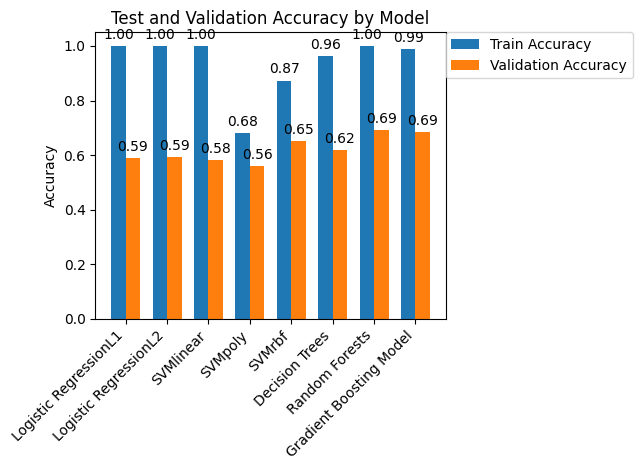

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?
import numpy as np
import matplotlib.pyplot as plt
labels = ['Logistic RegressionL1','Logistic RegressionL2', 'SVMlinear', 'SVMpoly', 'SVMrbf', 'Decision Trees', 'Random Forests', 'Gradient Boosting Model']
train_accuracy = [0.9986, 1.0, 1.0, 0.6822, 0.8729, 0.9644, 0.9997, 0.9872]
validation_accuracy = [0.5883, 0.5933, 0.5832, 0.56, 0.6522, 0.6192, 0.6931, 0.6855]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracy, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, validation_accuracy, width, label='Validation Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Test and Validation Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 45, ha = 'right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

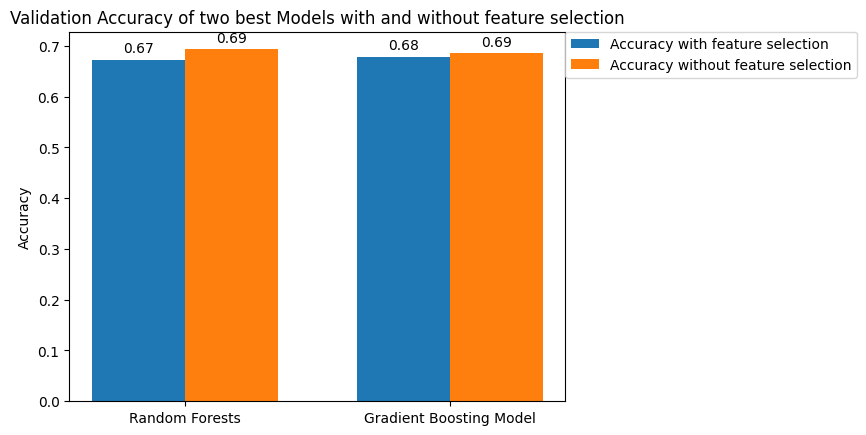

In [ ]:
label2 = ['Random Forests','Gradient Boosting Model']
validation_accuracy = [0.6931, 0.6855]
selection_accuracy = [0.6725, 0.6780]

x = np.arange(len(label2))
width = 0.35

fig, ax = plt.subplots()
rects3 = ax.bar(x - width/2, selection_accuracy, width, label='Accuracy with feature selection')
rects4 = ax.bar(x + width/2, validation_accuracy, width, label='Accuracy without feature selection')

ax.set_ylabel('Accuracy')
ax.set_title('Validation Accuracy of two best Models with and without feature selection')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
autolabel(rects3)
autolabel(rects4)

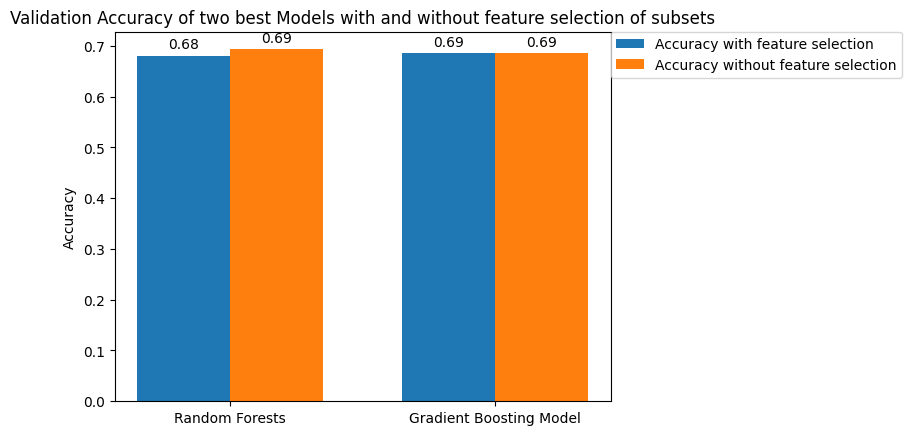

In [ ]:
label3 = ['Random Forests','Gradient Boosting Model']
validation_accuracy = [0.6931, 0.6855]
selection_accuracy = [0.6802, 0.6855]

x = np.arange(len(label3))
width = 0.35

fig, ax = plt.subplots()
rects5 = ax.bar(x - width/2, selection_accuracy, width, label='Accuracy with feature selection')
rects6 = ax.bar(x + width/2, validation_accuracy, width, label='Accuracy without feature selection')

ax.set_ylabel('Accuracy')
ax.set_title('Validation Accuracy of two best Models with and without feature selection of subsets')
ax.set_xticks(x)
ax.set_xticklabels(label3)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
autolabel(rects5)
autolabel(rects6)

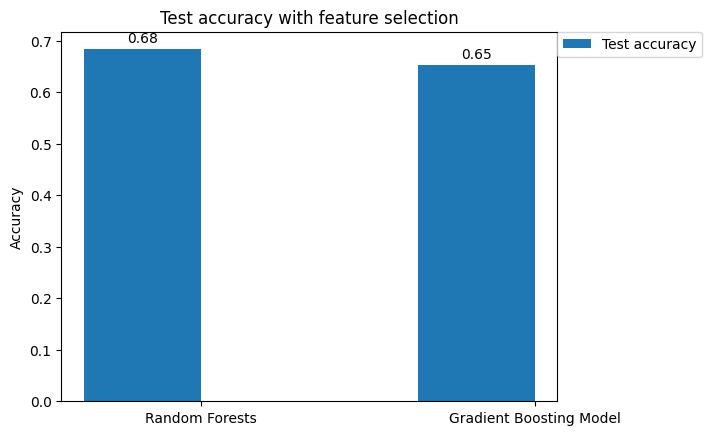

In [ ]:
label4 = ['Random Forests','Gradient Boosting Model']
test_accuracy = [0.6836, 0.653]

x = np.arange(len(label4))
width = 0.35

fig, ax = plt.subplots()
rects7 = ax.bar(x - width/2, test_accuracy, width, label='Test accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Test accuracy with feature selection')
ax.set_xticks(x)
ax.set_xticklabels(label4)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
autolabel(rects7)

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

What concepts from lecture/breakout were most relevant to your project? How so?

What aspects of your project did you find most surprising?

What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

What was the most helpful feedback you received during your presentation? Why?

If you had two more weeks to work on this project, what would you do next? Why?

The concepts of logistic regression, SVM, optimization, decision tree, random forest and gradient boosting were the most relevant to our project. Because we indeed applied them to a real problem. One thing that surprises the team is that the runtime of some methods is significantly long. Our team decided to use some techniques to reduce the runtime at the risk of not finding the optimal, which is a tradeoff between efficiency and accuracy. The other surprising thing is that optimization and regularization can not guarantee to give a better result. One of the important lessons is that when choosing the dataset, the team should take a closer look at the data and see if it contains sufficient enough information to train the model well. How well the model was trained, and the generalization of the model relied highly on the quality of the data.

If the team has another two weeks to work on this project, the team may adopt PCA transformation on the dataset to reduce the high dimensionality and hope it will address the overfitting problems. With additional time, more subtle hyperparameter tuning methods could be explored.


